## French data monitor

Uses Eurostat database. Access directly and cross check via [here](https://ec.europa.eu/eurostat/data/database)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # HP filter and OLS regression
import datetime

In [2]:
import eurostat
import data_monitor_eurostat_load as estatload

In [3]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 2.5

In [4]:
pd.set_option('display.precision', 2)

### How to get data series on particular theme

Get table of contents, narrow it down based on keywords

In [5]:
toc = eurostat.get_toc_df()

In [6]:
eurostat.subset_toc_df(toc, "labour productivity")

,title,code,type,last update of data,last table structure change,data start,data end
949,Labour productivity in GDP (constant prices) p...,enpe_nama_10_lp,dataset,11.02.2022,26.01.2022,2005,2020
1259,Labour productivity and unit labour costs,nama_10_lp_ulc,dataset,02.12.2022,14.01.2022,1975,2021
1260,Labour productivity and unit labour costs at i...,nama_10_lp_a21,dataset,03.12.2022,14.01.2022,1975,2021
1262,Labour Productivity at regional level,nama_10r_lp,folder,,,,
1263,Nominal Labour productivity by NUTS 2 regions,nama_10r_2nlp,dataset,06.05.2022,20.02.2022,2000,2020
1264,Nominal Labour productivity by NUTS 3 regions,nama_10r_3nlp,dataset,06.05.2022,20.02.2022,2000,2020
1265,Real Labour productivity by NUTS 2 regions,nama_10r_2rlp,dataset,06.05.2022,20.02.2022,1995,2020
1275,Labour productivity and unit labour costs,namq_10_lp_ulc,dataset,02.12.2022,27.10.2022,1975Q1,2022Q3
8116,Nominal labour productivity per person employe...,tec00116,table,02.12.2022,02.12.2022,2010,2021
8599,Apparent labour productivity by NACE Rev. 2,tin00152,table,27.10.2022,27.10.2022,2009,2020


Once `code` is known, extract that table

In [7]:
unemp_fr = estatload.get_eurostat_country_data('ei_lmhr_m', 'FR', 'SA')

In [8]:
unemp_countries = estatload.get_eurostat_allcountry_data('ei_lmhr_m', 'LM-UN-T-TOT', 'SA')

In [9]:
#Another series of interest may be TOT_X_NRG_FOOD_S, ie core inflation

In [10]:
hicp_countries = estatload.get_eurostat_allcountry_hicp('prc_hicp_midx', 'CP00')

### Get productivity

In [11]:
df = eurostat.get_data_df('namq_10_lp_ulc', flags=False) 

See flags available

In [12]:
df[(df['geo\\time']=='FR')]

,unit,s_adj,na_item,geo\time,2022Q3,2022Q2,2022Q1,2021Q4,2021Q3,2021Q2,...,1977Q2,1977Q1,1976Q4,1976Q3,1976Q2,1976Q1,1975Q4,1975Q3,1975Q2,1975Q1
16,CLV_PCH_PRE,SCA,RLPR_HW,FR,NaN,NaN,NaN,NaN,NaN,-0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,CLV_PCH_PRE,SCA,RLPR_PER,FR,NaN,NaN,NaN,NaN,NaN,0.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,CLV_PCH_SM,NSA,NULC_HW,FR,NaN,NaN,NaN,NaN,NaN,-4.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,CLV_PCH_SM,NSA,NULC_PER,FR,NaN,NaN,NaN,NaN,NaN,-4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,CLV_PCH_SM,NSA,RLPR_HW,FR,NaN,NaN,NaN,NaN,NaN,-1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,CLV_PCH_SM,NSA,RLPR_PER,FR,NaN,NaN,NaN,NaN,NaN,16.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,CLV_PCH_SM,SCA,RLPR_HW,FR,NaN,NaN,NaN,NaN,NaN,-2.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,CLV_PCH_SM,SCA,RLPR_PER,FR,NaN,NaN,NaN,NaN,NaN,15.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,I10,NSA,NULC_HW,FR,117.88,116.27,114.09,114.03,112.29,110.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,I10,NSA,NULC_PER,FR,119.16,117.52,115.33,115.20,113.35,112.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Productivity per person

In [13]:
prod_per_countries = df[(df['unit']=='I10') & (df['na_item']=='RLPR_PER') & (df['s_adj']=='SCA')].drop(['unit', 'na_item', 's_adj'],axis=1).set_index('geo\\time').T
prod_per_countries = prod_per_countries.set_index(pd.to_datetime(prod_per_countries.index)).sort_index()
prod_per_countries.index.name='date'

Productivity per hour worked

In [14]:
prod_hw_countries = df[(df['unit']=='I10') & (df['na_item']=='RLPR_HW') & (df['s_adj']=='SCA')].drop(['unit', 'na_item', 's_adj'],axis=1).set_index('geo\\time').T
prod_hw_countries = prod_hw_countries.set_index(pd.to_datetime(prod_hw_countries.index)).sort_index()
prod_hw_countries.index.name='date'

### Quick look at the latest data

In [16]:
def get_latest_series(ser, name):
    # Extract latest available datapoint from a series
    # Store latest date and value, index using 'name'
    latest = ser[ser.notnull()].tail(1)
    latest= pd.DataFrame(latest).assign(name=name).reset_index().set_index('name')
    latest.columns = ['date_latest', 'value_latest']
    pre_latest = ser[ser.notnull()].tail(2).head(1)
    pre_latest= pd.DataFrame(pre_latest).assign(name=name).reset_index().set_index('name')
    pre_latest.columns = ['date_previous', 'value_previous']
    pre_latest.drop(['date_previous'], axis=1, inplace=True)
    return latest.join(pre_latest)

def plot_latest(servals, sernames):
    # show table with latest variables in servals, with names in sernames
    latest = sernames # Declare a list with same names
    for i, sername in enumerate(sernames):
        latest[i]=get_latest_series(servals[i], sername)
    display(pd.concat(latest))

In [17]:
servals   = [unemp_fr['LM-UN-T-TOT'], unemp_fr['LM-UN-T-LE25']]
sernames  = ['Unemployment rate (all)', 'Youth unemployment(<=25)']

plot_latest(servals, sernames)

,date_latest,value_latest,value_previous
name,,,
Unemployment rate (all),2022-10-01,7.1,7.1
Youth unemployment(<=25),2022-10-01,18.2,17.8


In [18]:
servals   = [unemp_countries['US'], unemp_countries['EA19'], unemp_countries['FR'], unemp_countries['DE']]
sernames  = ['Unemployment rate US', 'Unemployment rate EA19',  'Unemployment rate France',  'Unemployment rate Germany']

plot_latest(servals, sernames)

,date_latest,value_latest,value_previous
name,,,
Unemployment rate US,2022-10-01,3.7,3.5
Unemployment rate EA19,2022-10-01,6.5,6.6
Unemployment rate France,2022-10-01,7.1,7.1
Unemployment rate Germany,2022-10-01,3.0,3.0


In [19]:
hicpinfl_fr = 100*(hicp_countries['FR']-hicp_countries['FR'].shift(12))/hicp_countries['FR'].shift(12)
hicpinfl_de = 100*(hicp_countries['DE']-hicp_countries['DE'].shift(12))/hicp_countries['DE'].shift(12)
hicpinfl_eu = 100*(hicp_countries['EA']-hicp_countries['EA'].shift(12))/hicp_countries['EA'].shift(12)

In [20]:
servals   = [hicpinfl_fr, hicpinfl_de,hicpinfl_eu]
sernames  = ['HICP inflation France', 'HICP inflation Germany',  'HICP inflation EA']

plot_latest(servals, sernames)

,date_latest,value_latest,value_previous
name,,,
HICP inflation France,2022-11-01,7.13,7.07
HICP inflation Germany,2022-10-01,11.56,10.90
HICP inflation EA,2022-11-01,10.03,10.62


### Plotting area

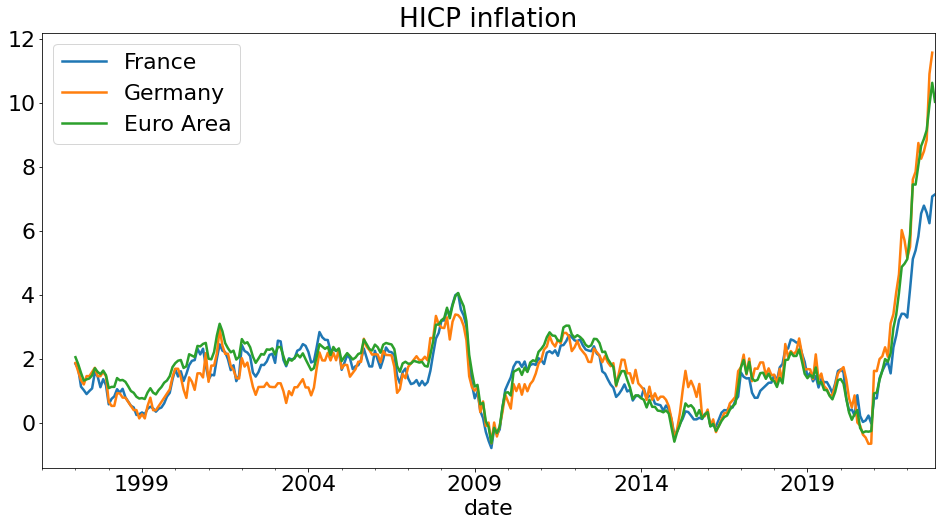

In [21]:
hicpinfl_fr.plot(label='France')
hicpinfl_de.plot(label='Germany')
hicpinfl_eu.plot(label='Euro Area')
#plt.xlim('2000-01-01', '2022-12-01')
plt.title('HICP inflation')
plt.legend()
plt.show()

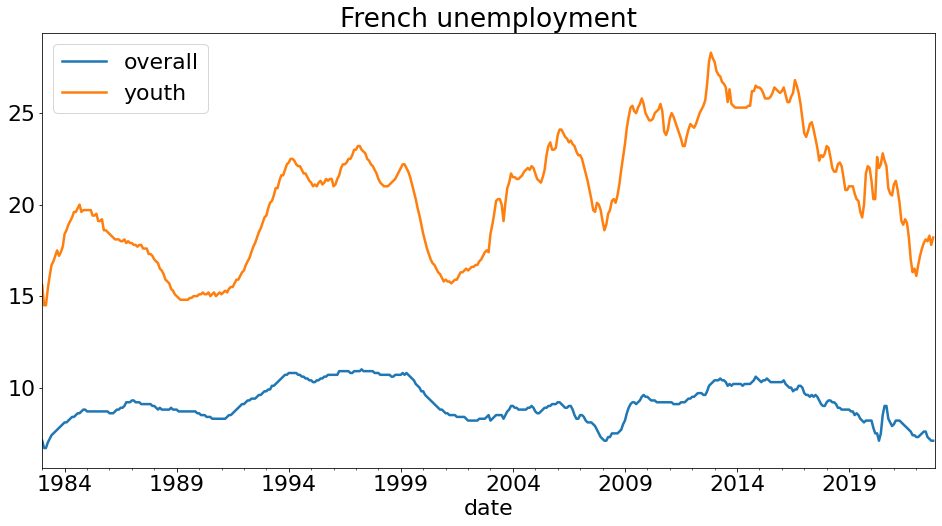

In [22]:
unemp_fr['LM-UN-T-TOT'].plot(label='overall')
unemp_fr['LM-UN-T-LE25'].plot(label='youth')
#plt.xlim('2000-01-01', '2022-12-01')
plt.title('French unemployment')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Unemployment rate by country')

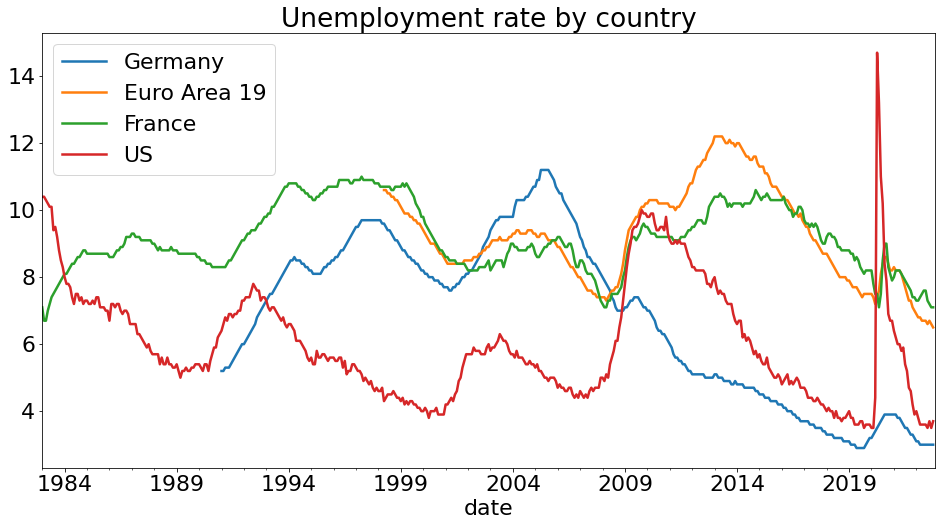

In [23]:
unemp_countries['DE'].plot(label='Germany')
unemp_countries['EA19'].plot(label='Euro Area 19')
unemp_countries['FR'].plot(label='France')
unemp_countries['US'].plot(label='US')
plt.legend()
plt.title('Unemployment rate by country')

In [24]:
prod_per_countries

geo\time,AT,BE,BG,CH,CY,CZ,DE,DK,EA,EA12,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
date,,,,,,,,,,,,,,,,,,,,,
1975-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,103.27,104.29,130.46,106.41,108.06,116.00,105.71,109.44,105.17,104.56,...,104.05,108.50,134.37,102.74,145.72,109.25,109.70,112.78,114.87,NaN
2021-10-01,101.57,104.51,132.17,105.90,109.72,116.92,105.33,110.86,104.98,104.48,...,103.92,107.32,136.04,104.66,146.01,110.19,110.54,117.84,114.85,NaN
2022-01-01,102.05,104.56,132.13,106.16,110.88,117.28,105.71,109.24,104.97,104.54,...,103.08,105.63,143.28,105.65,147.29,111.81,109.48,116.97,114.68,NaN


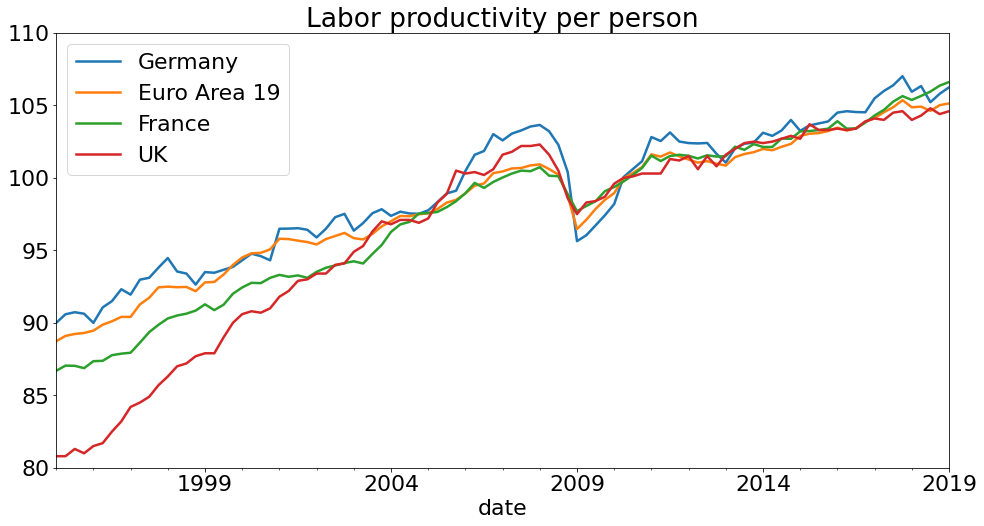

In [25]:
prod_per_countries['DE'].plot(label='Germany')
prod_per_countries['EA19'].plot(label='Euro Area 19')
prod_per_countries['FR'].plot(label='France')
prod_per_countries['UK'].plot(label='UK')
plt.legend()
# Zoom in on relevant time period
plt.xlim('1995-01-01', '2019-01-01')
plt.ylim(80,110)
plt.title('Labor productivity per person');

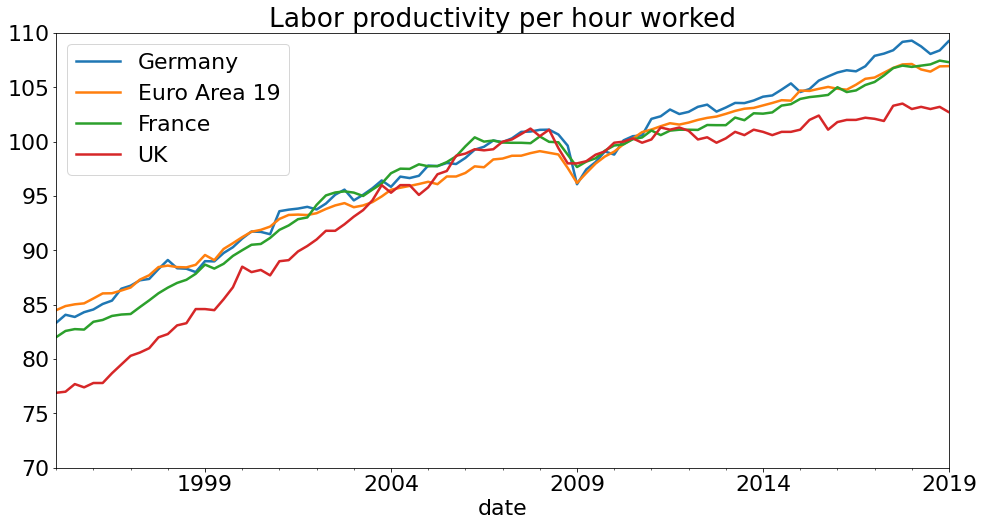

In [74]:
prod_hw_countries['DE'].plot(label='Germany')
prod_hw_countries['EA19'].plot(label='Euro Area 19')
prod_hw_countries['FR'].plot(label='France')
prod_hw_countries['UK'].plot(label='UK')
plt.legend()
# Zoom in on relevant time period
plt.xlim('1995-01-01', '2019-01-01')
plt.ylim(70,110)
plt.title('Labor productivity per hour worked');